# 03_data_analysis

This notebook is a real-world example of how to read csv files, explore them, clean data and plot timeseries and build different types of visualizations.

## Libraries

Following, a brief but dense overview of the operations that can be performed with the following libraries.

---

### `numpy`

Is our library for computation of mathematical operations.


**1. Array Creation**
- **From Lists/Tuples**: Convert Python lists or tuples to `numpy` arrays using `np.array()`.
- **Predefined Arrays**: Create arrays with predefined values using functions like `np.zeros()`, `np.ones()`, `np.full()`, `np.eye()`, and `np.empty()`.
- **Range Arrays**: Generate arrays with evenly spaced values using `np.arange()` and `np.linspace()`.

**2. Array Manipulation**
- **Reshaping**: Change the shape of an array without changing its data using `np.reshape()`.
- **Flattening**: Convert a multi-dimensional array to a one-dimensional array using `np.ravel()` or `np.flatten()`.
- **Transposing**: Swap the axes of an array using `np.transpose()` or the `.T` attribute.
- **Concatenation**: Combine arrays using `np.concatenate()`, `np.vstack()`, and `np.hstack()`.

**3. Mathematical Operations**
- **Element-wise Operations**: Perform operations like addition, subtraction, multiplication, and division element-wise.
- **Universal Functions (ufuncs)**: Apply mathematical functions like `np.sin()`, `np.cos()`, `np.exp()`, and `np.sqrt()` element-wise.
- **Aggregate Functions**: Compute statistics like sum, mean, median, variance, and standard deviation using `np.sum()`, `np.mean()`, `np.median()`, `np.var()`, and `np.std()`.

**4. Linear Algebra**
- **Matrix Multiplication**: Perform matrix multiplication using `np.dot()` or the `@` operator.
- **Decompositions**: Perform matrix decompositions like eigenvalue decomposition (`np.linalg.eig()`) and singular value decomposition (`np.linalg.svd()`).
- **Solving Linear Systems**: Solve linear equations using `np.linalg.solve()`.

**5. Random Number Generation**
- **Random Arrays**: Generate arrays of random numbers using `np.random.random()`, `np.random.randint()`, `np.random.normal()`, and other distributions.
- **Seeding**: Control random number generation with `np.random.seed()`.

**6. Indexing and Slicing**
- **Basic Indexing**: Access elements, rows, and columns using indices.
- **Boolean Indexing**: Select elements that satisfy certain conditions.
- **Fancy Indexing**: Access multiple elements using arrays of indices.

**7. Broadcasting**
- **Automatic Expansion**: Perform operations on arrays of different shapes by automatically expanding dimensions to match.

**8. File I/O**
- **Reading/Writing**: Read from and write to files using `np.loadtxt()`, `np.savetxt()`, `np.load()`, and `np.save()`.

**9. Advanced Functions**
- **Sorting**: Sort arrays using `np.sort()` and `np.argsort()`.
- **Unique Elements**: Find unique elements and their counts using `np.unique()`.
- **Set Operations**: Perform set operations like union, intersection, and difference using `np.union1d()`, `np.intersect1d()`, and `np.setdiff1d()`.

---

### `pandas`

Pandas is a powerful Python library for data manipulation and analysis, particularly well-suited for working with structured data like time series. It provides efficient data structures and tools for handling large datasets, including CSV files containing time series data. Here's a brief overview of Pandas and its operations for I/O of CSV files with time series:

1. Data Structures:
Pandas offers two main data structures:
- Series: A one-dimensional labeled array
- DataFrame: A two-dimensional labeled data structure with columns of potentially different types[1][2]

2. Reading CSV files:
To read a CSV file containing time series data, you can use the `pd.read_csv()` function. For time series data, you'll often want to specify a date/time column as the index:

```python
import pandas as pd
df = pd.read_csv('timeseries.csv', parse_dates=['date_column'], index_col='date_column')
```

This function allows various parameters to customize the import process, such as specifying date formats, handling missing values, or selecting specific columns.

3. Writing CSV files:
To save a DataFrame containing time series data to a CSV file, use the `to_csv()` method:

```python
df.to_csv('output_timeseries.csv')
```

In [6]:
# libraries
import os
import sys
import json
import logging
import math
import glob
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

logger = logging.getLogger(__name__)
logging.basicConfig(filename='data_analysis.log', level=logging.INFO)

logging.info('START...')
logging.info('Load modules...')

In [45]:
root = "./data"
fn_falda_bertacchini = os.path.join(root, "falda_bertacchini.csv")
fn_precipitations_bertacchini = os.path.join(root, "precipitations_bertacchini.csv")
fn_soilmoisture_bertacchini = os.path.join(root, "soilmoisture_bertacchini.csv")
fn_temperature_bertacchini = os.path.join(root, "temperature_bertacchini.csv")
fn_irrigazione2020 = os.path.join(root, "irrigazione2020.xlsx")

In [46]:
list_fn_csv = glob.glob(os.path.join(root, "*.csv"))
list_fn_csv.append(glob.glob(os.path.join(root, "*.xlsx")))

folder_plot = os.path.join(root, '../figures/')
if not os.path.exists(folder_plot):
    os.mkdir(folder_plot)

In [47]:
df_falda_bertacchini = pd.read_csv(
    fn_falda_bertacchini, sep="|",
    parse_dates=[-1]
)
df_precipitations_bertacchini = pd.read_csv(
    fn_precipitations_bertacchini, sep="|",
    parse_dates=[-1], 
)
df_soilmoisture_bertacchini = pd.read_csv(
    fn_soilmoisture_bertacchini, sep="|",
    parse_dates=[-1]
)
df_temperature_bertacchini = pd.read_csv(
    fn_temperature_bertacchini, sep="|",
    parse_dates=[-1]
)
df_irrigazione2020 = pd.read_excel(fn_irrigazione2020)

In [48]:
df_falda_bertacchini          = df_falda_bertacchini.set_index(pd.to_datetime(df_falda_bertacchini['timestamp'], format='ISO8601'))
df_precipitations_bertacchini = df_precipitations_bertacchini.set_index(pd.to_datetime(df_precipitations_bertacchini['timestamp'], format='ISO8601'))
df_soilmoisture_bertacchini   = df_soilmoisture_bertacchini.set_index(pd.to_datetime(df_soilmoisture_bertacchini['timestamp'], format='ISO8601'))
df_temperature_bertacchini    = df_temperature_bertacchini.set_index(pd.to_datetime(df_temperature_bertacchini['timestamp'], format='ISO8601'))

In [49]:
df_falda_bertacchini.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12630 entries, 2020-01-15 14:29:47.815499+00:00 to 2020-12-22 21:56:10.934000+00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   result     12630 non-null  object
 1   value      12630 non-null  int64 
 2   timestamp  12630 non-null  object
dtypes: int64(1), object(2)
memory usage: 394.7+ KB


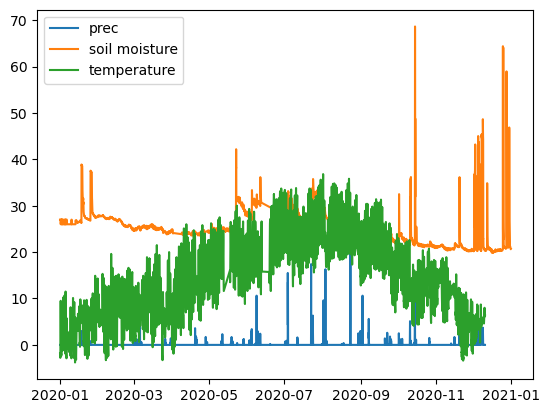

In [50]:
for df, label in zip([df_precipitations_bertacchini,df_soilmoisture_bertacchini,df_temperature_bertacchini],['prec','soil moisture','temperature']):
    plt.plot(df.value, label=label)
plt.legend()

In [51]:
df_falda_bertacchini.describe()

,value
count,12630.000000
mean,487.843468
std,1139.233880
min,-23.000000
25%,3.000000
50%,276.000000
75%,804.000000
max,65514.000000


In [52]:
df_falda_bertacchini.head()

,result,value,timestamp
timestamp,,,
2020-01-15 14:29:47.815499+00:00,nodeID://b13698101,266,2020-01-15T14:29:47.815499Z
2020-01-15 14:34:50.064948+00:00,nodeID://b13698183,268,2020-01-15T14:34:50.064948Z
2020-01-15 14:34:50.064948+00:00,nodeID://b13698220,268,2020-01-15T14:34:50.064948Z
2020-01-15 14:39:53.467706+00:00,nodeID://b13698239,268,2020-01-15T14:39:53.467706Z
2020-01-15 14:44:56.546245+00:00,nodeID://b13698318,269,2020-01-15T14:44:56.546245Z


In [53]:
df_falda_bertacchini.tail()

,result,value,timestamp
timestamp,,,
2020-12-21 07:01:03.193000+00:00,nodeID://b22458781,1795,2020-12-21T07:01:03.193Z
2020-12-22 18:11:24.944000+00:00,nodeID://b22486792,1806,2020-12-22T18:11:24.944Z
2020-12-22 19:11:23.407000+00:00,nodeID://b22487592,1786,2020-12-22T19:11:23.407Z
2020-12-22 20:11:23.753000+00:00,nodeID://b22488392,1785,2020-12-22T20:11:23.753Z
2020-12-22 21:56:10.934000+00:00,nodeID://b22489776,1781,2020-12-22T21:56:10.934Z


In [54]:
df_falda_bertacchini.dropna()

,result,value,timestamp
timestamp,,,
2020-01-15 14:29:47.815499+00:00,nodeID://b13698101,266,2020-01-15T14:29:47.815499Z
2020-01-15 14:34:50.064948+00:00,nodeID://b13698183,268,2020-01-15T14:34:50.064948Z
2020-01-15 14:34:50.064948+00:00,nodeID://b13698220,268,2020-01-15T14:34:50.064948Z
2020-01-15 14:39:53.467706+00:00,nodeID://b13698239,268,2020-01-15T14:39:53.467706Z
2020-01-15 14:44:56.546245+00:00,nodeID://b13698318,269,2020-01-15T14:44:56.546245Z
...,...,...,...
2020-12-21 07:01:03.193000+00:00,nodeID://b22458781,1795,2020-12-21T07:01:03.193Z
2020-12-22 18:11:24.944000+00:00,nodeID://b22486792,1806,2020-12-22T18:11:24.944Z
2020-12-22 19:11:23.407000+00:00,nodeID://b22487592,1786,2020-12-22T19:11:23.407Z


## df_irrigazione2020

In [55]:
# df_irrigazione2020.dropna(inplace=True)
df_irrigazione2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NUMPREN               270 non-null    float64       
 1   DATARICHIESTA         270 non-null    object        
 2   SOTTOZONA             270 non-null    object        
 3   CND_CCNDCCON          270 non-null    float64       
 4   CND_DCNDCOGN          270 non-null    object        
 5   CND_DCNDNOME          270 non-null    object        
 6   CND_CUTEDENO          270 non-null    object        
 7   P_COMUNE              270 non-null    object        
 8   P_INDIRIZZO           270 non-null    object        
 9   CODICEAPP             270 non-null    float64       
 10  SUPERFICIE            270 non-null    float64       
 11  SUPERFICIEIRR_NUM     270 non-null    float64       
 12  COLTURA_DES           270 non-null    object        
 13  IRRIGAZIONE_DES     

In [56]:
# from legenda.docx
# some data have to be rescaled to make some sense

df_irrigazione2020.loc[:,'PORTATALS_NUM'] = df_irrigazione2020['PORTATALS_NUM']/100
df_irrigazione2020.loc[:,'DURATA_ORE_EFFETTIVE'] = df_irrigazione2020['DURATA_ORE_EFFETTIVE']/100
df_irrigazione2020.loc[:,'VOLUMEEROGATO_NUM'] = df_irrigazione2020['VOLUMEEROGATO_NUM']/100

In [57]:
list_cod_appezz_irri = np.unique(df_irrigazione2020.CODICEAPP.dropna().values); list_cod_appezz_irri

array([ 1464.,  1700.,  1702.,  2079.,  2275.,  2547.,  2811.,  3097.,
        3232.,  4351.,  4674.,  6275.,  7018.,  8946., 11309., 12255.,
       12694., 13281., 13631., 13743., 13985., 14043., 14192., 14724.,
       14771., 14893., 15539., 16128., 16427., 17052., 17215., 17826.,
       18069., 18366., 18454., 19939., 20108., 20163., 20693., 22368.,
       22603., 23280., 23309., 23350., 23363., 23571., 23572., 27029.,
       27296., 27297., 28028., 28270., 28767., 29796., 29948., 30191.,
       30836., 31310., 31805., 31806., 32203., 33269., 33406., 34021.,
       34784., 34866., 34992., 35489., 35542., 35550., 35644., 35728.])

Retrieve available shapefiles to check if some fields are missing in the shapefiles or in the irrigation dataset.

In [58]:
# create grouped dataframe by field
df_irrigazione2020_groupfield = df_irrigazione2020.groupby('CODICEAPP').first()

In [59]:
df_irrigazione2020[df_irrigazione2020['COLTURA_DES']=='BARBABIETOLE']['IRRIGAZIONE_DES']

64    Rotolone soprachioma
Name: IRRIGAZIONE_DES, dtype: object

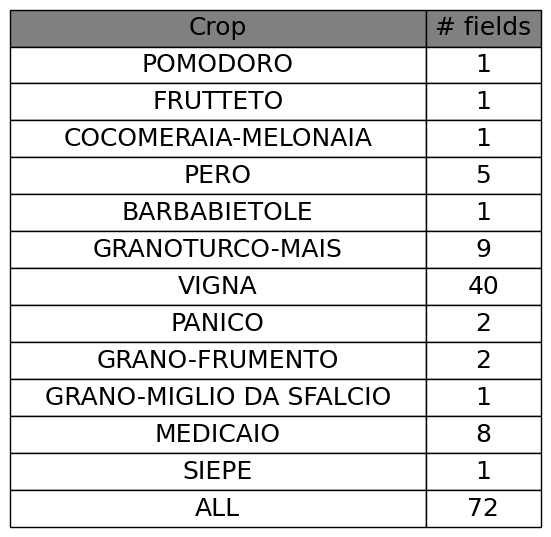

In [60]:
# Create a list to store the table data
table_data = [['Crop', '# fields']]
crop_list = list(set(df_irrigazione2020.COLTURA_DES.dropna().values))

# Loop through each irrigation type and count the occurrences in the DataFrame
tot = 0
for e in crop_list:
    count = len(df_irrigazione2020_groupfield[df_irrigazione2020_groupfield['COLTURA_DES'] == e])
    table_data.append([e, count])
    tot+=count
table_data.append(['ALL', tot])

fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# adjust width, color, etc
for i in range(len(table_data[0])):
    cell = table[0, i]
    cell.set_facecolor('gray')
row_height = 0.1
for (row, col), cell in table.get_celld().items():
    cell.set_height(row_height)
    cell._loc = 'center'
table.auto_set_font_size(False); table.set_fontsize(18)
table.auto_set_column_width(col=[i for i in range(len(table_data[0]))])
ax.axis('tight'); ax.axis('off')

plotname = os.path.join(folder_plot, 'table_crop_types.svg')
if not os.path.exists(plotname): plt.savefig(plotname, bbox_inches='tight')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24703 entries, 2020-01-01 01:00:00+00:00 to 2020-12-10 23:00:00+00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   result     24703 non-null  object             
 1   value      24703 non-null  float64            
 2   timestamp  24703 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 772.0+ KB


In [63]:
df.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='timestamp', length=24703)

# Plotting playground

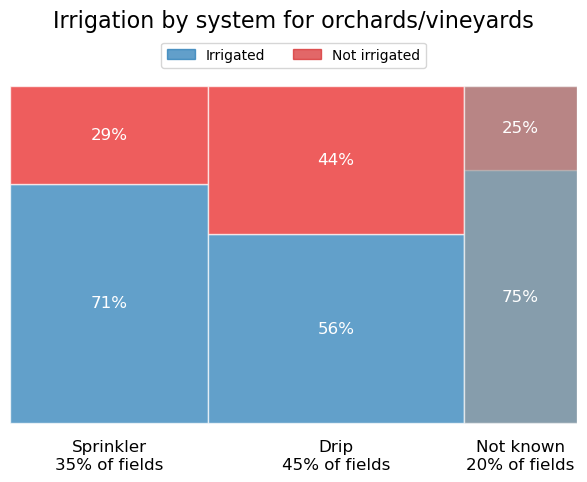

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
plt.tight_layout()

# xy, width, height
spri_irri = 0.71; spri_no_irri = 0.29
drip_irri = 0.56; drip_no_irri = 0.44
nn_irri = 3/4; nn_no_irri = 1/4
spri_w = 7/20; drip_w = 9/20; nn_w = 4/20; nn_h=1
alpha = .7

c_irri = '#1f78b4'; c_no_irri = '#e71818'

# sprinkler
ax.add_patch(patches.Rectangle((0, 0.1), spri_w, spri_irri, color=c_irri, ec='w', alpha=alpha))
ax.add_patch(patches.Rectangle((0, 0.1+spri_irri), spri_w, spri_no_irri, color=c_no_irri, ec='w', alpha=alpha))

# drip
ax.add_patch(patches.Rectangle((spri_w, 0.1), drip_w, drip_irri, color=c_irri, ec='w', alpha=alpha))
ax.add_patch(patches.Rectangle((spri_w, 0.1+drip_irri), drip_w, drip_no_irri, color=c_no_irri, ec='w', alpha=alpha))

# not known
ax.add_patch(patches.Rectangle((spri_w+drip_w, 0.1), nn_w, nn_irri, color=c_irri, ec='w', alpha=0.5))
ax.add_patch(patches.Rectangle((spri_w+drip_w, 0.1+nn_irri), nn_w, nn_no_irri, color=c_no_irri, ec='w', alpha=0.5))
ax.add_patch(patches.Rectangle((spri_w+drip_w, 0.1), nn_w, nn_h, color='gray', ec='w', alpha=0.5))

ax.text(spri_w/2, 0.1 + spri_irri/2, f'{round(spri_irri*100)}%', ha='center', va='center', color='white', fontsize=12)
ax.text(spri_w/2, 0.1 + spri_irri + spri_no_irri/2, f'{round(spri_no_irri*100)}%', ha='center', va='center', color='white', fontsize=12)
ax.text(spri_w + drip_w/2, 0.1 + drip_irri/2, f'{round(drip_irri*100)}%', ha='center', va='center', color='white', fontsize=12)
ax.text(spri_w + drip_w/2, 0.1 + drip_irri + drip_no_irri/2, f'{round(drip_no_irri*100)}%', ha='center', va='center', color='white', fontsize=12)
ax.text(spri_w + drip_w + nn_w/2, 0.1 + nn_irri/2, f'{round(nn_irri*100)}%', ha='center', va='center', color='white', fontsize=12)
ax.text(spri_w + drip_w + nn_w/2, 0.1 + nn_irri + nn_no_irri/2, f'{round(nn_no_irri*100)}%', ha='center', va='center', color='white', fontsize=12)


ax.text(spri_w/2, 0.05,
        f'Sprinkler\n{int(round(spri_w*100,0))}% of fields', ha='center', va='top', fontsize=12)
ax.text(spri_w + drip_w/2, 0.05,
        f'Drip\n{int(round(drip_w*100,0))}% of fields', ha='center', va='top', fontsize=12)
ax.text(spri_w + drip_w + nn_w/2, 0.05,
        f'Not known\n{int(round(nn_w*100,0))}% of fields', ha='center', va='top', fontsize=12)

# legend
blue_patch = patches.Patch(color='tab:blue', label='Irrigated', alpha=alpha)
red_patch = patches.Patch(color='tab:red', label='Not irrigated', alpha=alpha)
ax.legend(handles=[blue_patch, red_patch], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


plt.xlim(0, 1)
plt.ylim(0, 1.25)
plt.title("Irrigation by system for orchards/vineyards", fontsize=16)
plt.axis('off')

plt.savefig('treemap_irrigation_2018_orchards.svg', transparent=True, dpi=300, bbox_inches='tight', pad_inches=.5)
plt.show()

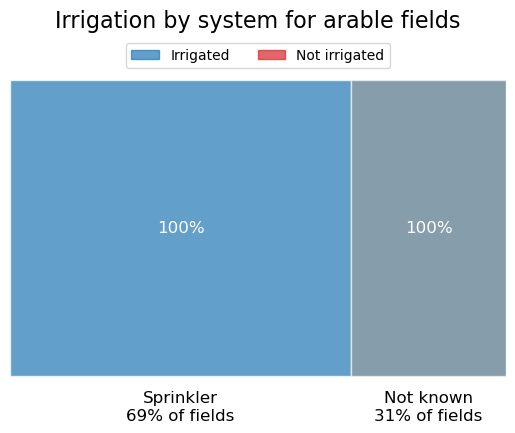

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

# xy, width, height
spri_irri = 1; spri_no_irri = 0
nn_irri = 1; nn_h
spri_w = 11/16; nn_w = 1-spri_w
alpha = .7

c_irri = '#1f78b4'; c_no_irri = '#e71818'
# sprinkler
ax.add_patch(patches.Rectangle((0, 0.1), spri_w, spri_irri, color=c_irri, ec='w', alpha=alpha))

# not known
ax.add_patch(patches.Rectangle((spri_w, 0.1), nn_w, nn_h, color=c_irri, ec='w', alpha=.5))
ax.add_patch(patches.Rectangle((spri_w, 0.1), nn_w, nn_h, color='gray', ec='w', alpha=.5))

ax.text(spri_w/2, 0.1 + spri_irri/2, f'{int(spri_irri*100)}%', ha='center', va='center', color='white', fontsize=12)
ax.text(spri_w+nn_w/2, 0.1 + nn_irri/2, f'{int(spri_irri*100)}%', ha='center', va='center', color='white', fontsize=12)

ax.text(spri_w/2, 0.05,
        f'Sprinkler\n{int(round(spri_w*100,0))}% of fields', ha='center', va='top', fontsize=12)
ax.text(spri_w + nn_w/2, 0.05,
        f'Not known\n{int(round(nn_w*100,0))}% of fields', ha='center', va='top', fontsize=12)

# legend
blue_patch = patches.Patch(color='tab:blue', label='Irrigated', alpha=alpha)
red_patch = patches.Patch(color='tab:red', label='Not irrigated', alpha=alpha)
ax.legend(handles=[blue_patch, red_patch], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)


plt.xlim(0, 1)
plt.ylim(0, 1.25)
plt.title("Irrigation by system for arable fields", fontsize=16)
plt.axis('off')
plt.savefig('treemap_irrigation_2018_arable.svg', transparent=True, dpi=300, bbox_inches='tight', pad_inches=.5)

plt.show()

# Satellite data playground

In [71]:
import os
import sys
import glob
import warnings
import geojson
import xarray as xr
import netCDF4 as nc
import datetime as dt
import gc
import re
import logging
from scipy.ndimage import gaussian_filter
import seaborn as sns
from scipy import stats
gc.enable()

fn_log = 'playground_satellite.log'
if os.path.exists(fn_log):
    os.remove(fn_log)
logger = logging.getLogger(__name__)
logging.basicConfig(filename=fn_log, level=logging.INFO)
logging.info('START...')
logging.info('Load modules...')


sys.path.append('../../')
from modules.lib_settings import *
from modules.lib_datasets_IrrigationItaly import *
from modules.lib_generic import *

In [75]:
import gc
gc.enable()

# Parse data settings
file_settings        = 'configuration_s0_Pixelwise.json'
data_settings        = get_data_settings(file_settings)

# Function to recursively assign variables from nested dictionaries and json files
def assign_variables(config_dict, prefix=''):
    var_dict = {}
    """Warning: this function works on the global() namespace of the module in which it is defined"""
    for key, value in config_dict.items():
        if isinstance(value, dict):
            # For nested dictionaries, add the current key to the prefix and recursively call the function
            assign_variables(value, prefix=prefix)
        else:
            # Assign the value to a global variable with the constructed name
            name_var = key
            if value=='True': value=True
            elif value=='False': value=False
            globals().update({name_var:value})
            del name_var

# Call the function with the parsed configuration
assign_variables(data_settings)

geojson_path = os.path.join(root, geojson_path)
output_path = os.path.join(root, folder_plot)
dates = [x.strftime(format_date) for x in pd.date_range(start_date, end_date, freq='D')]
    
print('Start date: ', start_date)
print('End_date: ', end_date)

# Filters definition
start_date_tstamp = pd.Timestamp(start_date)
end_date_tstamp = pd.Timestamp(end_date)
limit_0 = pd.Timestamp('2014-10-03')
limit_1 = pd.Timestamp('2016-09-30')
limit_2 = pd.Timestamp('2016-10-02')

Start date:  2017-01-01
End_date:  2023-12-31


In [82]:
field_id = 'cod_appezz_1464'
fn = glob.glob(output_path+'*'+field_id+'*')[0]
print(fn)

./sentinel_1_data/s0_cod_appezz_1464_2017-23.nc


In [83]:
ds = xr.open_dataset(fn, engine='netcdf4')
ds

<xarray.Dataset> Size: 29MB
Dimensions:    (datetime: 1419, latitude: 15, longitude: 42)
Coordinates:
  * datetime   (datetime) datetime64[ns] 11kB 2017-01-04T06:00:00 ... 2023-12...
  * latitude   (latitude) float64 120B 44.76 44.76 44.76 ... 44.76 44.76 44.76
  * longitude  (longitude) float64 336B 10.73 10.73 10.73 ... 10.73 10.73 10.73
Data variables:
    orb        (datetime, latitude, longitude) float64 7MB ...
    VV         (datetime, latitude, longitude) float64 7MB ...
    VH         (datetime, latitude, longitude) float64 7MB ...
    angle      (datetime, latitude, longitude) float64 7MB ...

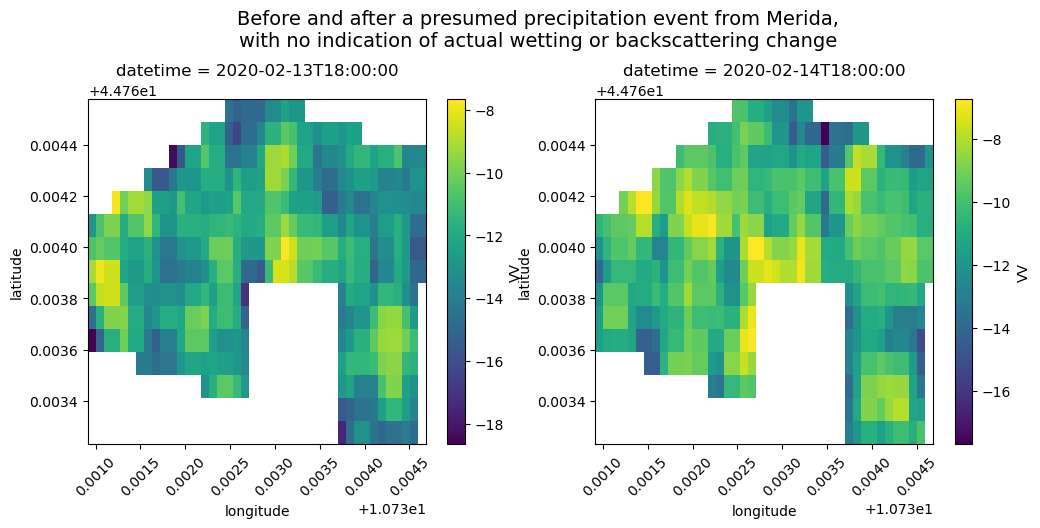

In [84]:
# plot map
plt.figure(figsize=(12,5))
plt.subplot(121)
ds.sel(datetime='2020-02-13T18')['VV'].plot()
plt.xticks(rotation=45)
plt.subplot(122)
ds.sel(datetime='2020-02-14')['VV'].plot()
plt.xticks(rotation=45)
plt.suptitle('Before and after a presumed precipitation event from Merida,\nwith no indication of actual wetting or backscattering change\n', fontsize=14)
plt.subplots_adjust(top=0.8)

In [85]:
df = ds.to_dataframe().reset_index()
df = df.groupby('datetime').mean()
df['month']=df.index.month

Text(0.5, 1.0, 'kde and stacked distributions by month')

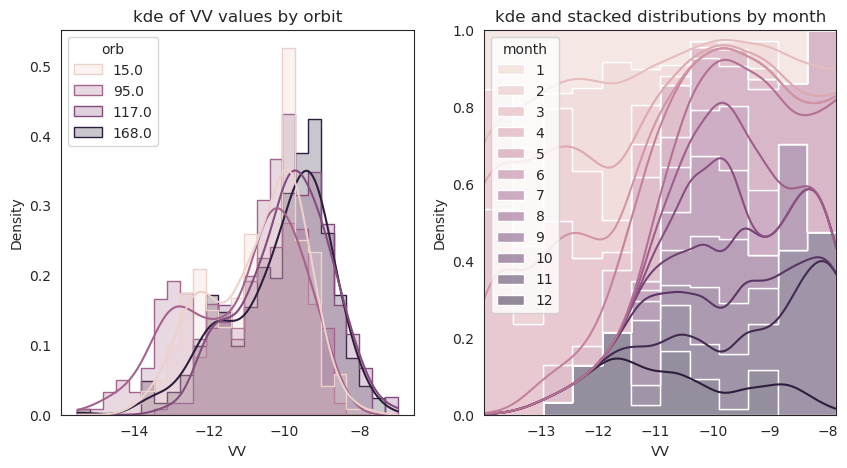

In [86]:
# compare the total distributions of the mean values
sns.set_style('white')
sns.set_palette('Set2')

fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df, x='VV', hue='orb', element='step', stat='density', common_norm=False, kde=True, ax=ax[0])
ax[0].set_title('kde of VV values by orbit')

sns.histplot(data=df[df.orb==15], x='VV', hue='month',
            element='step', stat='density', common_norm=False, kde=True,
            multiple='fill', ax=ax[1])
ax[1].set_title('kde and stacked distributions by month')

The next figure shows the monthly distributions, for all orbits, aggregated throughout the years. Backscattering reveals a climatology of "dry-soil" backscattering with a wide spread in the first 4 months of the year, while the distribution narrows on higher, "wet-soil" or vegetated backscattering values from early summer to the end of the year. 

Text(0.5, 0.98, 'Monthly distributions')

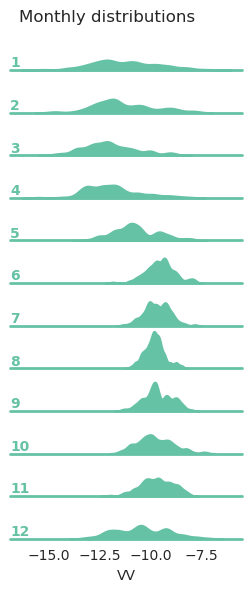

In [88]:
# Initialize the FacetGrid object
data = df
x = df['VV']
m = df['month']
o = df['orb']
data = pd.DataFrame(dict(x=x, m=m, o=o))
pal = sns.color_palette('Set2', 1)
g = sns.FacetGrid(data=data, row="m", hue='m', aspect=6, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'x',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, 'x', clip_on=False, color="w", lw=1, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, 'm')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.1)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel='VV')
g.despine(bottom=True, left=True)
plt.suptitle('Monthly distributions')

# Reading inputs of various types

In [105]:
# ----------------------------------------------------------------------------
# read tif files and extract data based on geometry of shapefile
def build_input_lonlat(file_shapes):
    import geopandas as gpd
    
    shape_df_WGS84 = gpd.read_file(file_shapes)
    # shape_df = gpd.read_file(file_shapes[1])
    # shape_df = shape_df.to_crs('EPSG:32632') # already in projected reference system
    centroid = shape_df_WGS84['geometry'].centroid # not needed
    lon_centroid = centroid.x[0]
    lat_centroid = centroid.y[0]
    return lat_centroid, lon_centroid

# ----------------------------------------------------------------------------
def build_input_soil(file_SoilGrids, lat_centroid, lon_centroid):
    """
    Get texture and soil characteristics
    https://www.isric.org/explore/soilgrids/faq-soilgrids#Which_soil_properties_are_predicted_by_SoilGrids

    Return: clay [%], sand [%], soc [g/kg], Wfc [%], Wwp [%]
    
    """
    import rasterio

    tif_path_list = glob.glob(file_SoilGrids)
    tif_clay = [f for f in tif_path_list if 'clay' in f]
    tif_sand = [f for f in tif_path_list if 'sand' in f]

    clay=[]; sand=[]
    conversion_factor_clay = 10
    conversion_factor_sand = 10

    for tif in tif_clay:
        clay.append(read_tif(tif, lat_centroid, lon_centroid))
    clay_m = np.nanmean(clay)/conversion_factor_clay
    for tif in tif_sand:
        sand.append(read_tif(tif, lat_centroid, lon_centroid))
    sand_m = np.nanmean(sand)/conversion_factor_sand
    
    return clay_m, sand_m

# ----------------------------------------------------------------------------
def read_tif(file, lat_centroid, lon_centroid):
    import rasterio
    with rasterio.open(file) as src:
        result = float(src.read(1)[src.index(lon_centroid, lat_centroid)])
        src.close()
    return result

In [106]:
file_shapes = './data/shapefiles/cod_appezz_1464.geojson'
file_SoilGrids = './data/soil/SoilGrids*'

In [107]:
lat_centroid, lon_centroid = build_input_lonlat(file_shapes)

/tmp/ipykernel_77093/2030390267.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = shape_df_WGS84['geometry'].centroid # not needed


In [109]:
clay, sand = build_input_soil(file_SoilGrids, lat_centroid=lat_centroid, lon_centroid=lon_centroid)